In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [6]:
df.isnull().any()

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

In [7]:
df.shape

(237, 4)

In [8]:
X=df['Head Size(cm^3)'].values

In [9]:
X.shape

(237,)

In [10]:
Y=df['Brain Weight(grams)'].values
Y.shape

(237,)

## y_pred=theta0+theta1*x
### THETA 1=sum(x-x_mean)(y-y_mean)/sum(x-x_mean)^2
### THETA0=mean_y-theta1*x_mean

In [11]:
x_mean=np.mean(X)

In [12]:
x_mean


3633.9915611814345

In [13]:
y_mean=np.mean(Y)

In [14]:
y_mean

1282.873417721519

In [15]:
num=0
deno=0
n=len(X)
for i in range(0,len(X)):
    num+=((X[i]-x_mean)*(Y[i]-y_mean))
    deno+=(X[i]-x_mean)**2
    

In [16]:
t1=num/deno
t1

0.26342933948939945

In [17]:
t0=y_mean-(t1*x_mean)
t0

325.57342104944223

### Y_pred=t0+t1*X
Y_pred=325.57+0.26*X

For x=3704 y is 1220 gms

In [18]:
y_pred=t0+(t1*3704)

In [19]:
y_pred

1301.3156945181777

## SCIKIT-LEARN

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
LR=LinearRegression()
X=X.reshape((n,1)) #sklearn cannot have rank-1 matrix

In [22]:
LR=LR.fit(X,Y)

In [23]:
y_pred=LR.predict(X)

In [24]:
LR.coef_

array([0.26342934])

In [25]:
LR.intercept_

325.5734210494428

## Training and testing 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=0)

In [28]:
train_x.shape

(189, 1)

In [30]:
reg=LinearRegression()


In [32]:
reg.fit(train_x,train_y)

LinearRegression()

In [36]:
y_pred=reg.predict(test_x)

In [37]:
df.tail(48)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
189,2,2,3703,1350
190,2,2,3165,1237
191,2,2,3354,1204
192,2,2,3000,1090
193,2,2,3687,1355
194,2,2,3556,1250
195,2,2,2773,1076
196,2,2,3058,1120
197,2,2,3344,1220
198,2,2,3493,1240


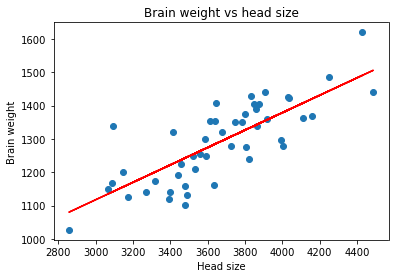

In [43]:
plt.scatter(test_x,test_y)
plt.xlabel("Head size")
plt.ylabel("Brain weight")
plt.title("Brain weight vs head size")
plt.plot(test_x,y_pred,color="r")

## Accuracy

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
np.sqrt(mean_squared_error(test_y,y_pred))

72.11529287182815